,Name,Sex,Age,Pclass,Fare,Survived,Relatives
0,"Braund, Mr. Owen Harris",male,22.0,3,7.2500,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26.0,3,7.9250,1,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,1,1
4,"Allen, Mr. William Henry",male,35.0,3,8.0500,0,0
...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0,2,13.0000,0,0
887,"Graham, Miss. Margaret Edith",female,19.0,1,30.0000,1,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,23.4500,0,3
889,"Behr, Mr. Karl Howell",male,26.0,1,30.0000,1,0


Jumlah baris: 891, Jumlah kolom: 13


,Pclass,Jumlah Penumpang
0,3,491
1,1,216
2,2,184


,Sex,Jumlah Penumpang
0,male,577
1,female,314


,Tidak Selamat,Selamat
Pclass,,
1,80,136
2,97,87
3,372,119


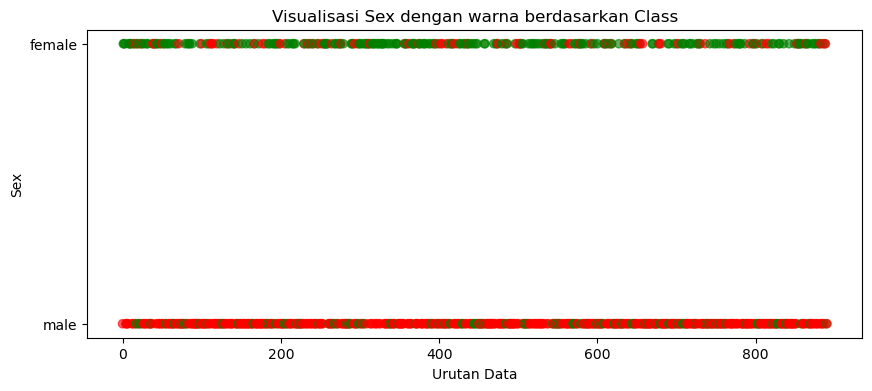

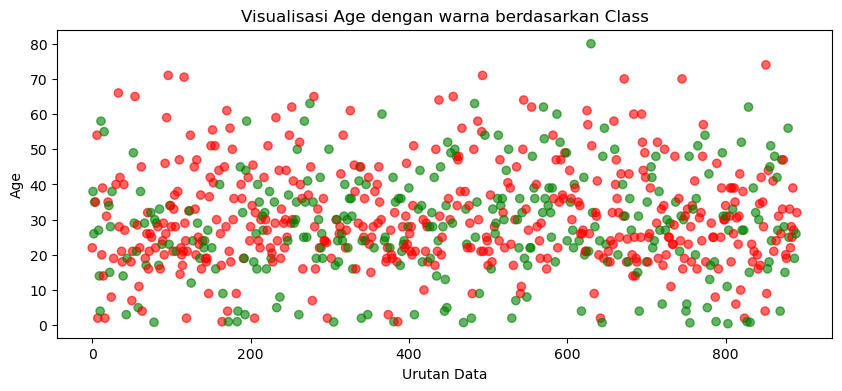

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca dataset
df = pd.read_csv('data/titanic.csv')

# 2. Tambahkan kolom Relatives
df['Relatives'] = df['SibSp'] + df['Parch']

# 3. Pilih kolom yang ingin ditampilkan dalam satu tabel
tabel_ringkasan = df[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'Survived', 'Relatives']]
display(tabel_ringkasan)

# 4. Tampilkan jumlah baris dan kolom
rows, cols = df.shape
print(f"Jumlah baris: {rows}, Jumlah kolom: {cols}")

# 5. Tampilkan ringkasan statistik dalam bentuk tabel
# Jumlah penumpang per Pclass
pclass_counts = df['Pclass'].value_counts().rename_axis('Pclass').reset_index(name='Jumlah Penumpang')
display(pclass_counts)

# Jumlah penumpang per Sex
sex_counts = df['Sex'].value_counts().rename_axis('Sex').reset_index(name='Jumlah Penumpang')
display(sex_counts)

# Jumlah penumpang selamat/tidak selamat per Pclass
survived_pclass = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
survived_pclass.columns = ['Tidak Selamat', 'Selamat']
display(survived_pclass)

# 6. Visualisasi
plt.figure(figsize=(10,4))
colors = df['Survived'].map({0:'red', 1:'green'})
plt.scatter(df.index, df['Sex'].map({'male':0, 'female':1}), c=colors, alpha=0.6)
plt.yticks([0,1], ['male', 'female'])
plt.xlabel('Urutan Data')
plt.ylabel('Sex')
plt.title('Visualisasi Sex dengan warna berdasarkan Class')
plt.show()

plt.figure(figsize=(10,4))
age_notnull = df['Age'].notnull()
plt.scatter(df.index[age_notnull], df['Age'][age_notnull], c=colors[age_notnull], alpha=0.6)
plt.xlabel('Urutan Data')
plt.ylabel('Age')
plt.title('Visualisasi Age dengan warna berdasarkan Class')
plt.show()